In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate, XGate
import random

In [214]:
n = 7  # Número de qubits físicos
qc = QuantumCircuit(2 * n - 1, n - 1)  # 7 qubits de código + 6 ancilla

# Inicialización: aplicar Hadamard en las ancillas
for i in range(6):
    qc.h(i + 7)
qc.barrier()
# Estabilizadores X (detección de bit-flip) usando CNOTs
qc.cx(12, 0)
qc.cx(12, 1)
qc.cx(12, 2)
qc.cx(12, 6)

qc.barrier()

qc.cx(11, 0)
qc.cx(11, 1)
qc.cx(11, 3)
qc.cx(11, 5)

qc.barrier()

qc.cx(10, 1)
qc.cx(10, 2)
qc.cx(10, 3)
qc.cx(10, 4)

qc.barrier()

# Estabilizadores Z (detección de phase-flip)
# Aplicamos H antes y después para convertir MCX en MCZ

qc.h(9)
qc.cx(9, 0)
qc.cx(9, 3)
qc.cx(9, 4)
qc.cx(9, 6)
qc.h(9)

qc.barrier()

qc.h(8)
qc.cx(8, 0)
qc.cx(8, 2)
qc.cx(8, 4)
qc.cx(8, 5)
qc.h(8)

qc.barrier()

qc.h(7)
qc.cx(7, 1)
qc.cx(7, 4)
qc.cx(7, 5)
qc.cx(7, 6)
qc.h(7)

qc.barrier()

qc.z(1)
'''
# Inyección de error
qubit_error = 0  # Siempre inyectamos un error en el qubit 0
error_type = np.random.choice(["X", "Z", "Y"])  # Tipo de error

if error_type == "X":
    qc.x(qubit_error)  # Aplica un error de bit-flip
elif error_type == "Z":
    qc.z(qubit_error)  # Aplica un error de fase
elif error_type == "Y":
    qc.y(qubit_error)  # Aplica un error combinado

print(f"Se inyectó un error {error_type} en el qubit {qubit_error}")
'''

qc.barrier()
for j in range(7, 10):  # Medir ancillas q7, q8, q9 antes del Hadamard final
    qc.measure(j, j-7)

qc.barrier()

# Volvemos a aplicar Hadamard a los qubits ancilla antes de medir
for i in range(6):
    qc.h(i + 7)

qc.barrier()

'''
# Mediciones
for j in range(6):
    qc.measure(j + 7, j)

'''


'\n# Mediciones\nfor j in range(6):\n    qc.measure(j + 7, j)\n\n'

In [217]:
sim = Aer.get_backend('qasm_simulator')
my_circuit = transpile(qc, sim)
job = sim.run(my_circuit)
result = job.result()
counts = result.get_counts()
print("Resultado:", counts)
outcome = max(counts, key=counts.get)

Resultado: {'000100': 132, '000010': 108, '000000': 130, '000101': 131, '000001': 146, '000110': 110, '000011': 141, '000111': 126}


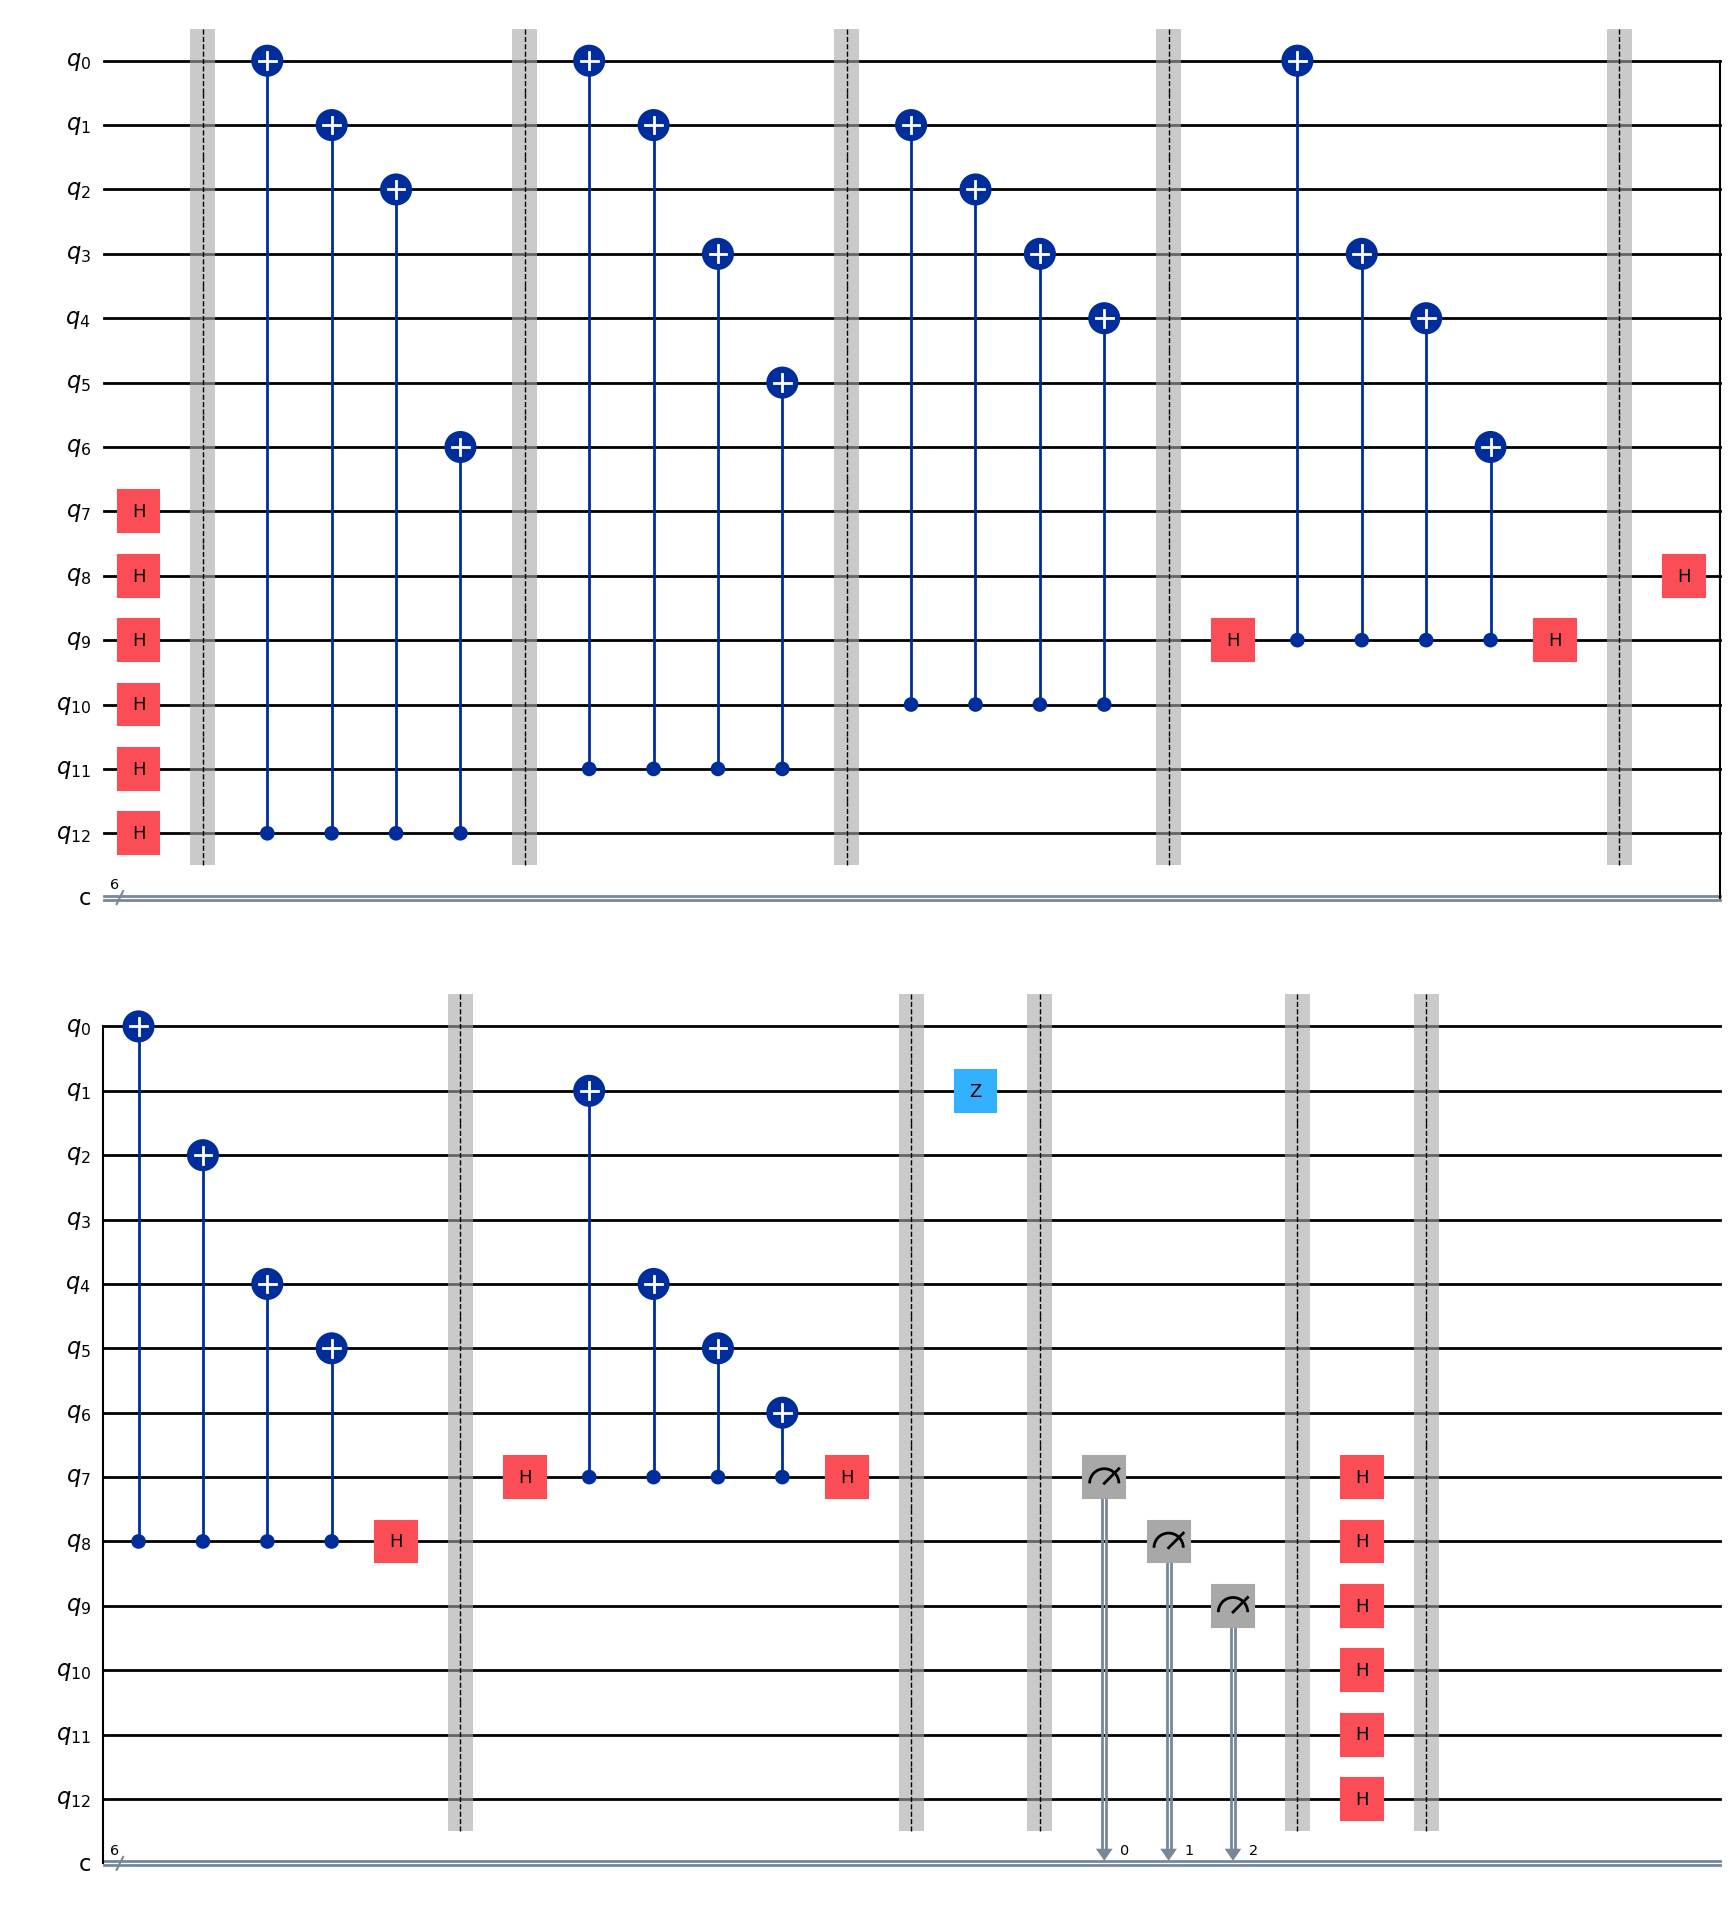

In [216]:
qc.draw('mpl')

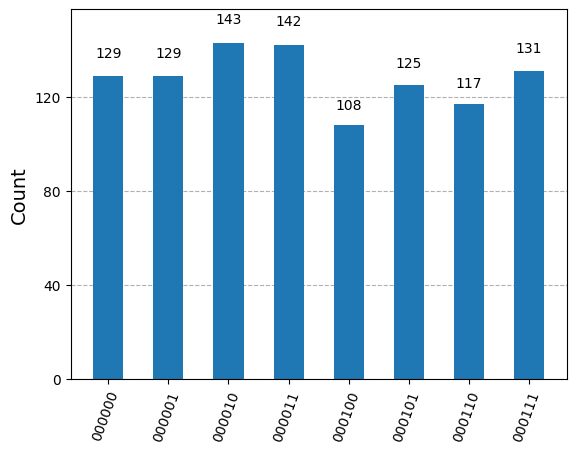

In [202]:
plot_histogram(counts)